In [76]:
import pandas as pd
import seaborn as sns

In [105]:
flights_df = pd.read_csv(
    filepath_or_buffer='../data/Dados_Estatisticos.csv',
    sep=";",
    header=1,
    usecols=['ANO', 'MES', 'GRUPO_DE_VOO', 'PASSAGEIROS_PAGOS']
    )

In [107]:
flights_df_filtered = flights_df[
    (flights_df["GRUPO_DE_VOO"]=="REGULAR") &
    (flights_df["ANO"]>=2009) &
    (flights_df["ANO"]<=2019)
    ][["ANO", "MES", "PASSAGEIROS_PAGOS"]]

In [108]:
flights_df_filtered["DATA"] = pd.to_datetime(
    flights_df_filtered.ANO.astype(str) + '/' + flights_df_filtered.MES.astype(str) + '/01'
    )
# flights_df_filtered = flights_df_filtered.drop(["ANO", "MES"], axis="columns")

In [109]:
time_serie_df = flights_df_filtered.groupby(by=["DATA", "ANO", "MES"], as_index=False).sum()

C:\Users\Fabyola Souza\AppData\Local\Temp\ipykernel_11416\3423823512.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(ylabels)


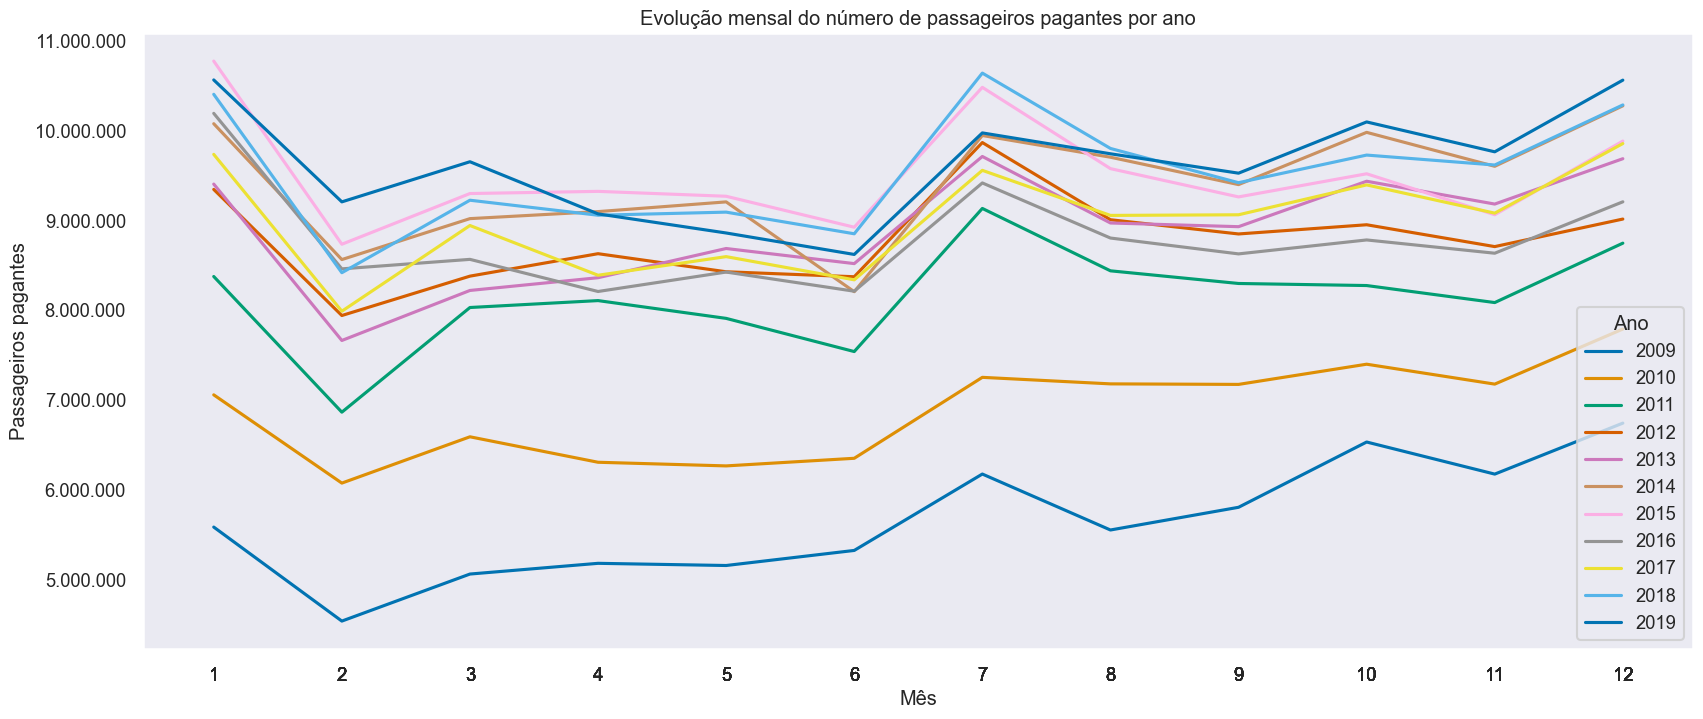

In [197]:
# Seaborn configs
sns.set_theme(
    style="dark",
    rc={'figure.figsize':(20,8)}
    )
sns.set_context("talk", font_scale=0.8)

plot = sns.lineplot(
    x="MES",
    y="PASSAGEIROS_PAGOS",
    hue="ANO",
    data=time_serie_df,
    legend="full",
    palette="colorblind"
    )

plot.ticklabel_format(style="plain", axis="y")
plot.set(
    xticks=time_serie_df["MES"],
    xlabel="Mês",
    ylabel="Passageiros pagantes",
    title="Evolução mensal do número de passageiros pagantes por ano"
    )

ylabels=[f'{int(y)}.000.000' for y in plot.get_yticks()/1000000]
plot.set_yticklabels(ylabels)
plot.legend(title="Ano", loc="lower right")

In [181]:
['{:.,2f}'.format(y) for y in plot.get_yticks()]

['4,000,000',
 '5,000,000',
 '6,000,000',
 '7,000,000',
 '8,000,000',
 '9,000,000',
 '10,000,000',
 '11,000,000',
 '12,000,000']